In [1]:
from numpy.random.mtrand import rand
from agent import Agent
from maze import Maze
from policy import Policy

from util import plot_matrix, transform_policy_to_matrix_values

In [2]:
MAX_EPISODES = 100_000
THRESHOLD = 0.1
CONVERGED_THRESHOLD=10

In [3]:
maze = Maze(
    lenght=4,
    height=4,
    all_rewards=-1,
    special_rewards={
        (3, 0): 40,
        (2, 1): -10,
        (3, 1): -10,
        (0, 3): 10,
        (1, 3): -2},
    end_positions=[(3, 0), (0, 3)]
)

In [4]:
random_policy = Policy(lenght=4, height=4, greedy=False)
optimal_policy = Policy(lenght=4, height=4)

In [5]:
agent = Agent(maze, optimal_policy, (2, 3), 1)
agent.value_iteration()
agent.update_policy_to_deterministic()


Sweep 0: 
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Sweep 1: 
[[-1 -1 40  0]
 [-1 -1 -1 40]
 [10 -1 -1 -1]
 [ 0 10 -1 -1]]
Sweep 2: 
[[-2 39 40  0]
 [ 9 -2 39 40]
 [10  9 -2 30]
 [ 0 10  8 -2]]
Sweep 3: 
[[38 39 40  0]
 [ 9 38 39 40]
 [10  9 29 30]
 [ 0 10  8 29]]
Sweep 4: 
[[38 39 40  0]
 [37 38 39 40]
 [10 37 29 30]
 [ 0 10 28 29]]
Sweep 5: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 30]
 [ 0 36 28 29]]
Sweep 6: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 29]]
Sweep 7: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 34]]
Done after 7 sweeps!



In [6]:
agent.simulate()


Simulating agent starting on (2, 3)
Moving from (2, 3) to (2, 2) ↑
Moving from (2, 2) to (1, 2) ←
Moving from (1, 2) to (1, 1) ↑
Moving from (1, 1) to (1, 0) ↑
Moving from (1, 0) to (2, 0) →
Moving from (2, 0) to (3, 0) →
Finished simulation om (3, 0)



In [7]:
agent.visualize()


Values:         Policy:
 38 39 40  0    →  →  →  ⦾   
 37 38 39 40    →  ↑  ↑  ↑   
 36 37 36 35    →  ↑  ←  ←   
  0 36 35 34    ⦾  ↑  ↑  ↑   



## First-visit Monte Carlo prediction
Policy: random<br>
discount: 1

In [8]:
agent.policy = random_policy
agent.discount = 1
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1150 episodes.
[[-14.95677233 -12.62556054  -0.97002141   0.        ]
 [-13.97321429 -17.52110092 -15.19259259  -3.19955157]
 [ -7.95493562 -15.1375     -22.00193798 -20.52380952]
 [  0.          -8.41684665 -19.17741935 -20.91907514]]
Stopped after 1260 episodes.
[[-14.53108808 -12.19675456  -0.55621302   0.        ]
 [-13.83265306 -17.56756757 -14.50921273  -3.0307377 ]
 [ -8.47047244 -15.75203915 -21.83421517 -20.86184211]
 [  0.          -8.75992063 -19.28118393 -21.208     ]]
Stopped after 1300 episodes.
[[-14.6475     -11.85380117  -0.03250478   0.        ]
 [-13.67258383 -17.37357259 -14.38373984  -2.80952381]
 [ -8.15839695 -15.52755906 -21.83788396 -20.82067511]
 [  0.          -8.86730769 -19.281893   -21.08268734]]
Stopped after 1359 episodes.
[[-14.41586538 -12.03910615  -0.22445255   0.        ]
 [-13.29981025 -17.61778471 -14.57054264  -3.35283019]
 [ -8.23765996 -15.61596386 -21.9821718  -21.33266129]
 [  0.          -9.17712177 -19.40039062 -21.05147059]]


## First-visit Monte Carlo prediction
Policy: random<br>
discount: 0.9

In [ ]:
agent.discount = 0.9
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Did not converge within 10000 episodes.
[[-4.85804922 -3.12852858  7.02371053  0.        ]
 [-4.98795783 -7.21915494 -4.74704152  2.09837472]
 [-0.76421159 -5.4676803  -9.23307613 -8.77394096]
 [ 0.         -1.53148058 -7.05815816 -8.53907453]]


## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 1

In [ ]:
agent.policy = optimal_policy
agent.discount = 1
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 41 episodes.
[[38. 39. 40.  0.]
 [37. 38. 39. 40.]
 [36. 37. 36. 35.]
 [ 0. 36. 35. 34.]]
Did not converge within 10000 episodes.
[[38. 39. 40.  0.]
 [37. 38. 39. 40.]
 [36. 37. 36. 35.]
 [ 0. 36. 35. 34.]]


## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 0.9

In [ ]:
agent.discount = 0.9
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 47 episodes.
[[30.5     35.      40.       0.     ]
 [26.45    30.5     35.      40.     ]
 [22.805   26.45    22.805   19.5245 ]
 [ 0.      22.805   19.5245  16.57205]]
Did not converge within 10000 episodes.
[[30.5     35.      40.       0.     ]
 [26.45    30.5     35.      40.     ]
 [22.805   26.45    22.805   19.5245 ]
 [ 0.      22.805   19.5245  16.57205]]


## Tabular TD
Policy: random<br>
discount: 1

In [ ]:
agent.policy = random_policy
agent.discount = 1
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Did not converge within 10000 episodes
[[-19.49822738 -17.32540102   6.95521913   0.        ]
 [-19.86640297 -21.34453338 -17.44461423 -12.73855833]
 [-11.8078661  -17.11426743 -24.63283635 -26.08899225]
 [  0.          -7.95492848 -21.94071122 -25.67457552]]


## Tabular TD
Policy: random<br>
discount: 0.9

In [ ]:
agent.policy = random_policy
agent.discount = 0.9
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Did not converge within 10000 episodes
[[-5.73521281 -4.11768768  6.49192947  0.        ]
 [-6.34228198 -8.22132543 -6.50339355 -0.11596683]
 [-1.57057035 -5.83276545 -9.11300607 -9.48284918]
 [ 0.         -3.51673701 -6.81914893 -8.44025317]]


## Tabular TD
Policy: optimal<br>
discount: 1

In [ ]:
agent.policy = optimal_policy
agent.discount = 1
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1162 episodes.
[[37.99993957 39.         40.          0.        ]
 [36.99287234 38.         38.99240949 39.99362928]
 [35.95138979 37.         36.         34.99990536]
 [ 0.         35.98643098 34.99841476 33.95805152]]


## Tabular TD
Policy: optimal<br>
discount: 0.9

In [ ]:
agent.discount = 0.9
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1187 episodes.
[[30.49998516 35.         40.          0.        ]
 [26.44902721 30.5        34.98916213 39.99292143]
 [22.73911036 26.45       22.805      19.52418366]
 [ 0.         22.79265917 19.52437196 16.56297417]]


## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 1

In [ ]:
agent.policy = random_policy
agent.discount = 1
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 60685 episodes.


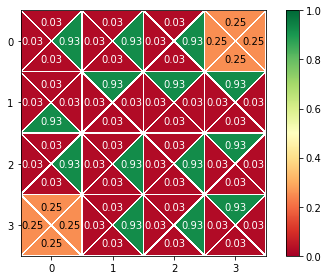

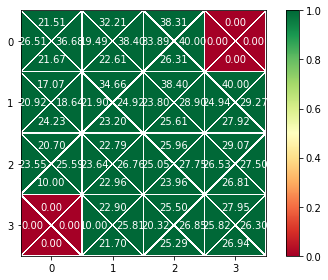

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf))

## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 0.9

In [ ]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 38667 episodes.


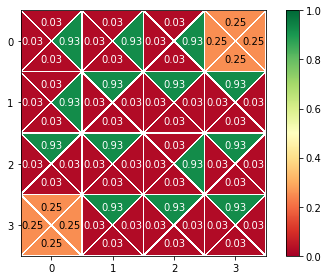

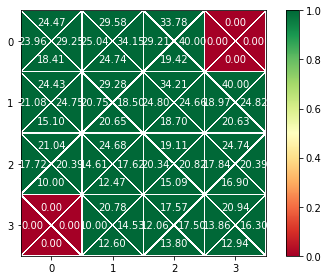

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf))

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 1

In [ ]:
agent.policy = random_policy
agent.discount = 1
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Did not converge within 100000 episodes


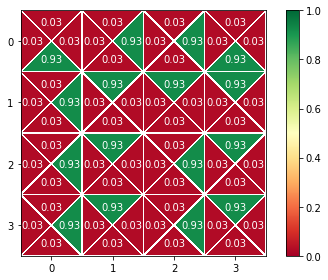

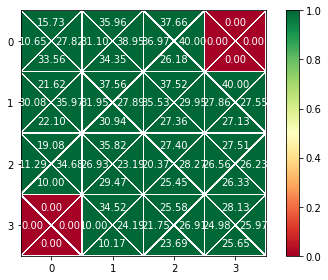

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf))

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [ ]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Did not converge within 100000 episodes


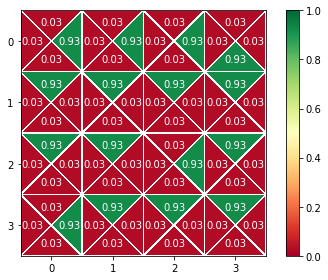

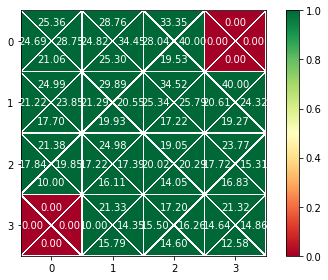

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf))

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 1

In [ ]:
agent.policy = random_policy
agent.discount = 1
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 7898 episodes.


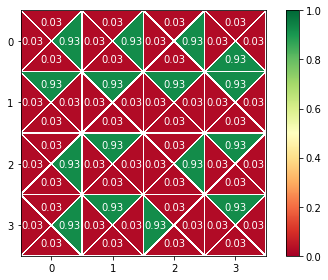

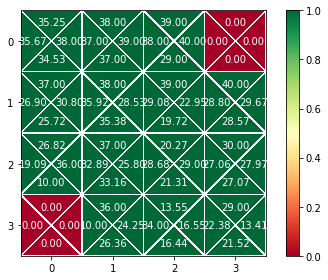

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf))

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [ ]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 7962 episodes.


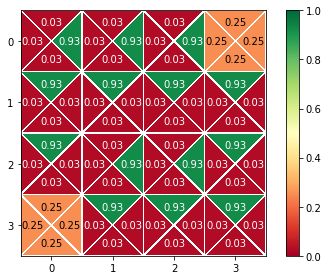

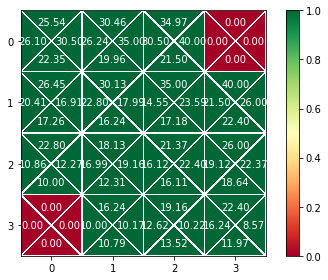

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf))

## Double Q-learning
policy: derived from Q<br>
discount: 1

In [ ]:
agent.policy = random_policy
agent.discount = 1
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 20928 episodes.


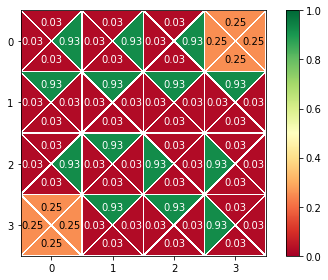

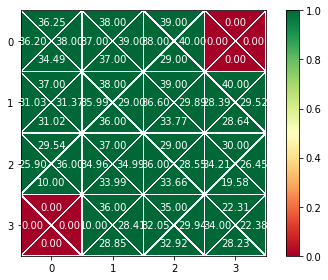

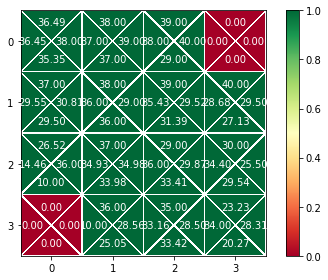

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]))

## Double Q-learning
policy: derived from Q<br>
discount: 0.9

In [ ]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 18692 episodes.


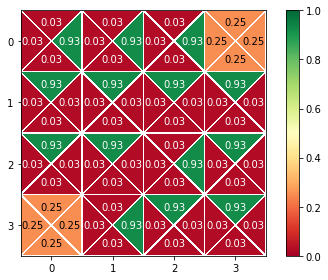

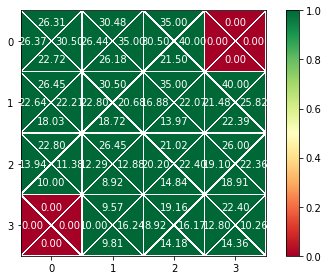

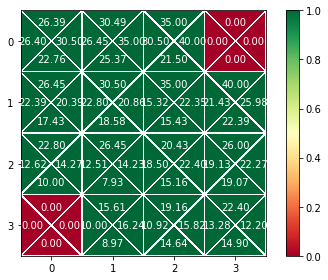

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]))
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]))